# data Collection

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_colwidth', 50)
df = pd.read_csv(r"C:\Users\Pratyush\Downloads\tc1.csv")

In [3]:
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution
0,2142,ER-Classification quality improvement,"Hi,\nfind attached one example of possible cle...",(1) Teamcenter,(7) Classification,Active,​Moved to DATA Streaming
1,2182,ER-STEP Type Dataset,Hi\nIs it possible to add a „new“ dataset type...,(1) Teamcenter,(1) TC services,Active,NaN
2,2229,ER-BOM REPORT ISSUES,"Hi Omar,\nI just discussed this with Vinay. Be...",(1) Teamcenter,(14) Configuration Changes,Active,NaN
3,2497,ER-VS: Vekt fra TC til SAP,"Hi,\nFind attached list of wheigths. How can w...",(1) Teamcenter,(1) TC services,Active,NaN
4,2508,ER-VS: Vekt fra TC til SAP,Data Stream,(1) Teamcenter,(1) TC services,Active,NaN
...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error during approval. Please check and comple...,(1) Teamcenter,(1) TC services,Resolved,​1
2894,1334,DC0202059 error,One more similar error. Please check and compl...,(1) Teamcenter,(1) TC services,Resolved,​1
2895,1344,Type of error when saving BOM in tc,"When saving BOM in TC, I get this message:\nDo...",(1) Teamcenter,(1) TC services,Resolved,​1
2896,1346,URGENT!! CAD files of standard parts,Can you please create CAD parts off the follow...,(1) Teamcenter,(1) TC services,Resolved,1


In [4]:
df['Title'].nunique()

2565

# data cleaning

In [5]:
 df.isnull().sum()

IssueID          0
Title            0
Description      2
Category         0
Sub-Category     0
IssueStatus      0
Resolution      74
dtype: int64

In [6]:
df["Description"].fillna("No Description", inplace = True)
df["Resolution"].fillna("No Resolution", inplace = True)
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution
0,2142,ER-Classification quality improvement,"Hi,\nfind attached one example of possible cle...",(1) Teamcenter,(7) Classification,Active,​Moved to DATA Streaming
1,2182,ER-STEP Type Dataset,Hi\nIs it possible to add a „new“ dataset type...,(1) Teamcenter,(1) TC services,Active,No Resolution
2,2229,ER-BOM REPORT ISSUES,"Hi Omar,\nI just discussed this with Vinay. Be...",(1) Teamcenter,(14) Configuration Changes,Active,No Resolution
3,2497,ER-VS: Vekt fra TC til SAP,"Hi,\nFind attached list of wheigths. How can w...",(1) Teamcenter,(1) TC services,Active,No Resolution
4,2508,ER-VS: Vekt fra TC til SAP,Data Stream,(1) Teamcenter,(1) TC services,Active,No Resolution
...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error during approval. Please check and comple...,(1) Teamcenter,(1) TC services,Resolved,​1
2894,1334,DC0202059 error,One more similar error. Please check and compl...,(1) Teamcenter,(1) TC services,Resolved,​1
2895,1344,Type of error when saving BOM in tc,"When saving BOM in TC, I get this message:\nDo...",(1) Teamcenter,(1) TC services,Resolved,​1
2896,1346,URGENT!! CAD files of standard parts,Can you please create CAD parts off the follow...,(1) Teamcenter,(1) TC services,Resolved,1


In [7]:
df.isnull().sum()

IssueID         0
Title           0
Description     0
Category        0
Sub-Category    0
IssueStatus     0
Resolution      0
dtype: int64

In [10]:
df["Category"].unique()

array(['(1) Teamcenter', '(3) T4S', '(2) NX', '(5) Data Corrections',
       '(10) User Errros'], dtype=object)

In [14]:
print(len(df[df["Category"]=="(1) Teamcenter"]))
print(len(df["Category"]))

2749
2898


In [8]:
# remove punctuations
import string
string.punctuation

def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [9]:
#df['Descprition'] = df['Description'].apply(lambda x: remove_punctuation(x))
df['Title'] = df['Title'].apply(lambda x: remove_punctuation(x))
df['Description'] = df['Description'].apply(lambda x: remove_punctuation(x))
df['Category'] = df['Category'].apply(lambda x: remove_punctuation(x))
df['SubCategory'] = df['Sub-Category'].apply(lambda x: remove_punctuation(x))
df['IssueStatus'] = df['IssueStatus'].apply(lambda x: remove_punctuation(x))
df['Resolution'] = df['Resolution'].apply(lambda x: remove_punctuation(x))


df.head()

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory
0,2142,ERClassification quality improvement,Hi\nfind attached one example of possible clea...,1 Teamcenter,(7) Classification,Active,​Moved to DATA Streaming,7 Classification
1,2182,ERSTEP Type Dataset,Hi\nIs it possible to add a „new“ dataset type...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC services
2,2229,ERBOM REPORT ISSUES,Hi Omar\nI just discussed this with Vinay Belo...,1 Teamcenter,(14) Configuration Changes,Active,No Resolution,14 Configuration Changes
3,2497,ERVS Vekt fra TC til SAP,Hi\nFind attached list of wheigths How can we ...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC services
4,2508,ERVS Vekt fra TC til SAP,Data Stream,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC services


In [10]:
#tokenization

import re

def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

df['Title'] = df['Title'].apply(lambda x: tokenize(x))
df['Description'] = df['Description'].apply(lambda x: tokenize(x))
df['Category'] = df['Category'].apply(lambda x: tokenize(x))
df['SubCategory'] = df['SubCategory'].apply(lambda x: tokenize(x))
df['IssueStatus'] = df['IssueStatus'].apply(lambda x: tokenize(x))
df['Resolution'] = df['Resolution'].apply(lambda x: tokenize(x))



df.head()

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory
0,2142,"[ERClassification, quality, improvement]","[Hi, find, attached, one, example, of, possibl...","[1, Teamcenter]",(7) Classification,[Active],"[, Moved, to, DATA, Streaming]","[7, Classification]"
1,2182,"[ERSTEP, Type, Dataset]","[Hi, Is, it, possible, to, add, a, new, datase...","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, services]"
2,2229,"[ERBOM, REPORT, ISSUES]","[Hi, Omar, I, just, discussed, this, with, Vin...","[1, Teamcenter]",(14) Configuration Changes,[Active],"[No, Resolution]","[14, Configuration, Changes]"
3,2497,"[ERVS, Vekt, fra, TC, til, SAP]","[Hi, Find, attached, list, of, wheigths, How, ...","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, services]"
4,2508,"[ERVS, Vekt, fra, TC, til, SAP]","[Data, Stream]","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, services]"


In [11]:
#stopwords
import nltk
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

df['Title'] = df['Title'].apply(lambda x: remove_stopwords(x))
df['Description'] = df['Description'].apply(lambda x: remove_stopwords(x))
df['Category'] = df['Category'].apply(lambda x: remove_stopwords(x))
df['SubCategory'] = df['SubCategory'].apply(lambda x: remove_stopwords(x))
df['IssueStatus'] = df['IssueStatus'].apply(lambda x: remove_stopwords(x))
df['Resolution'] = df['Resolution'].apply(lambda x: remove_stopwords(x))

df.head()


,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory
0,2142,"[ERClassification, quality, improvement]","[Hi, find, attached, one, example, possible, c...","[1, Teamcenter]",(7) Classification,[Active],"[, Moved, DATA, Streaming]","[7, Classification]"
1,2182,"[ERSTEP, Type, Dataset]","[Hi, Is, possible, add, new, dataset, type, li...","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, services]"
2,2229,"[ERBOM, REPORT, ISSUES]","[Hi, Omar, I, discussed, Vinay, Below, fix, is...","[1, Teamcenter]",(14) Configuration Changes,[Active],"[No, Resolution]","[14, Configuration, Changes]"
3,2497,"[ERVS, Vekt, fra, TC, til, SAP]","[Hi, Find, attached, list, wheigths, How, auto...","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, services]"
4,2508,"[ERVS, Vekt, fra, TC, til, SAP]","[Data, Stream]","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, services]"


In [12]:
#stemming(reducing derrived words to their root words)

#import nltk 
#from nltk.stem import PorterStemmer
#ps = PorterStemmer()

#def stemming(tokenized_text):
 #   text = [ps.stem(word) for word in tokenized_text]
  #  return text

#df['Title'] = df['Title'].apply(lambda x: stemming(x))
#df['Description'] = df['Description'].apply(lambda x: stemming(x))
#df['Category'] = df['Category'].apply(lambda x: stemming(x))
#df['SubCategory'] = df['SubCategory'].apply(lambda x: stemming(x))
#df['IssueStatus'] = df['IssueStatus'].apply(lambda x: stemming(x))
#df['Resolution'] = df['Resolution'].apply(lambda x: stemming(x))

#df.head()

In [13]:
#lemmatization(more accurate than stemming)
import nltk
wn = nltk.WordNetLemmatizer()
#ps = nltk.PorterStemmer()



In [14]:
def lemmatization(token_txt):
    text = [wn.lemmatize(word, pos='v') for word in token_txt]
    return text

df['Title'] = df['Title'].apply(lambda x: lemmatization(x))
df['Description'] = df['Description'].apply(lambda x: lemmatization(x))
df['Category'] = df['Category'].apply(lambda x: lemmatization(x))
df['SubCategory'] = df['SubCategory'].apply(lambda x: lemmatization(x))
df['IssueStatus'] = df['IssueStatus'].apply(lambda x: lemmatization(x))
df['Resolution'] = df['Resolution'].apply(lambda x: lemmatization(x))

df


,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory
0,2142,"[ERClassification, quality, improvement]","[Hi, find, attach, one, example, possible, cle...","[1, Teamcenter]",(7) Classification,[Active],"[, Moved, DATA, Streaming]","[7, Classification]"
1,2182,"[ERSTEP, Type, Dataset]","[Hi, Is, possible, add, new, dataset, type, li...","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, service]"
2,2229,"[ERBOM, REPORT, ISSUES]","[Hi, Omar, I, discuss, Vinay, Below, fix, issu...","[1, Teamcenter]",(14) Configuration Changes,[Active],"[No, Resolution]","[14, Configuration, Changes]"
3,2497,"[ERVS, Vekt, fra, TC, til, SAP]","[Hi, Find, attach, list, wheigths, How, automa...","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, service]"
4,2508,"[ERVS, Vekt, fra, TC, til, SAP]","[Data, Stream]","[1, Teamcenter]",(1) TC services,[Active],"[No, Resolution]","[1, TC, service]"
...,...,...,...,...,...,...,...,...
2893,1326,"[DC0201996, error]","[Error, approval, Please, check, complete, Wha...","[1, Teamcenter]",(1) TC services,[Resolved],"[, 1]","[1, TC, service]"
2894,1334,"[DC0202059, error]","[One, similar, error, Please, check, complete]","[1, Teamcenter]",(1) TC services,[Resolved],"[, 1]","[1, TC, service]"
2895,1344,"[Type, error, save, BOM, tc]","[When, save, BOM, TC, I, get, message, Does, s...","[1, Teamcenter]",(1) TC services,[Resolved],"[, 1]","[1, TC, service]"
2896,1346,"[URGENT, CAD, file, standard, part]","[Can, please, create, CAD, part, follow, part,...","[1, Teamcenter]",(1) TC services,[Resolved],[1],"[1, TC, service]"


In [15]:
import re
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = lemmatization)

X = cv.fit_transform(df['Title'])
print(X.shape)

(2898, 3473)


In [16]:
print(cv.get_feature_names())

['', '000384', '004333', '01', '0180', '0181', '01810182', '02', '03102019', '046117', '069', '093603Classification', '1', '100', '10010', '100BSS', '108', '1080', '109', '11', '11024', '1110', '111324086', '111324586', '111325086', '111339986', '111366786', '111372786', '111387186', '111410786', '111438786', '111445786', '111455486', '111455586', '111465086', '111485586', '111570786', '11161', '111663586', '11pdf', '12', '12400', '12408', '12410', '12412', '129', '13287', '13288', '14008', '14016', '14016C1111011758BOMREPORT15062018103146xlsx', '14519', '1454447', '150', '155', '161017HRSLong', '1641927', '1641927317130urgent', '1642829', '1643036', '16430C1111008173BOMREPORT18022019130245xlsx', '17047', '1729495Engine', '17297', '17297319', '17318', '1732024', '17326', '1732728', '17333', '17345', '1734651', '177', '180', '18014', '180418', '181', '19002100', '1950203', '2', '200028622', '200031838', '200041391200030783', '201117', '20170914Tegnuts', '20181127', '204828B', '21122019'

# converting data into machine lang(Data Vectorization)

In [17]:
df_sample = df
cv1 = CountVectorizer(analyzer = lemmatization)

Xc = cv1.fit_transform(df_sample['Title'])

print(X.shape)

(2898, 3473)


In [18]:
df1 = pd.DataFrame(Xc.toarray(), columns=cv1.get_feature_names())
df1

,,000384,004333,01,0180,0181,01810182,02,03102019,046117,...,yet,Ø100,Ø10x1,Ø10x15,Ø381,Ø95,å,åpne,åpnes,åpning
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#df_sample1 = df
#cv2 = CountVectorizer(analyzer = lemmatization)

Y = cv1.fit_transform(df_sample['Description'])


print(Y.shape)

(2898, 8640)


In [20]:
df2 = pd.DataFrame(Y.toarray(), columns=cv1.get_feature_names())
df2

,,0,000,0001,00045139,00054760600,000567,001977,00441733,00444037,...,ær,ø10x1,ø12,ø16x45,ø17A4,ø186,ø305,ø32,ø321mm,ø90
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2895,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2896,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#df_sample2 = df
#cv3 = CountVectorizer(analyzer = lemmatization)

Z = cv1.fit_transform(df_sample['Category'])


print(Z.shape)


(2898, 12)


In [22]:
df3 = pd.DataFrame(Z.toarray(), columns=cv1.get_feature_names())
df3

,1,10,2,3,5,Corrections,Data,Errros,NX,T4S,Teamcenter,User
0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1,0,0,0,0,0,0,0,0,0,1,0
2894,1,0,0,0,0,0,0,0,0,0,1,0
2895,1,0,0,0,0,0,0,0,0,0,1,0
2896,1,0,0,0,0,0,0,0,0,0,1,0


In [23]:
#df_sample3 = df
#cv4 = CountVectorizer(analyzer = lemmatization)

A = cv1.fit_transform(df_sample['SubCategory'])


print(A.shape)


(2898, 54)


In [24]:
df4 = pd.DataFrame(A.toarray(), columns=cv1.get_feature_names())
df4

,1,11,12,13,14,15,16,17,18,2,...,Network,Others,Ownership,Report,Request,TC,Upload,Workflow,issue,service
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2894,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2895,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2896,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [25]:
#df_sample4 = df
#cv5 = CountVectorizer(analyzer = lemmatization)

B = cv1.fit_transform(df_sample['IssueStatus'])


print(B.shape)


(2898, 3)


In [26]:
df5 = pd.DataFrame(B.toarray(), columns=cv1.get_feature_names())
df5

,Active,Closed,Resolved
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
2893,0,0,1
2894,0,0,1
2895,0,0,1
2896,0,0,1


In [27]:
#df_sample5 = df
#cv6 = CountVectorizer(analyzer = lemmatization)

C = cv1.fit_transform(df_sample['Resolution'])


print(C.shape)


(2898, 5676)


In [28]:
df6 = pd.DataFrame(C.toarray(), columns=cv1.get_feature_names())
df6

,,0,0019,00BC2693,01,01012100,011,011m,0180,018001810182,...,àAs,àCXSS00704023,àChanged,àEnd,àFor,àGAdrawing,àOwnership,àRight,àUser,àWe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2894,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2895,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
def lemmatization1(token_txt):
    text = " ".join([wn.lemmatize(word, pos='v') for word in token_txt])
    return text

df['Title'] = df['Title'].apply(lambda x: lemmatization1(x))
df['Description'] = df['Description'].apply(lambda x: lemmatization1(x))
df['Category'] = df['Category'].apply(lambda x: lemmatization1(x))
df['SubCategory'] = df['SubCategory'].apply(lambda x: lemmatization1(x))
df['IssueStatus'] = df['IssueStatus'].apply(lambda x: lemmatization1(x))
df['Resolution'] = df['Resolution'].apply(lambda x: lemmatization1(x))

df


,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory
0,2142,ERClassification quality improvement,Hi find attach one example possible cleanups n...,1 Teamcenter,(7) Classification,Active,Moved DATA Streaming,7 Classification
1,2182,ERSTEP Type Dataset,Hi Is possible add new dataset type list Teamc...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service
2,2229,ERBOM REPORT ISSUES,Hi Omar I discuss Vinay Below fix issue In Str...,1 Teamcenter,(14) Configuration Changes,Active,No Resolution,14 Configuration Changes
3,2497,ERVS Vekt fra TC til SAP,Hi Find attach list wheigths How automate uplo...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service
4,2508,ERVS Vekt fra TC til SAP,Data Stream,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service
...,...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error approval Please check complete What reas...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service
2894,1334,DC0202059 error,One similar error Please check complete,1 Teamcenter,(1) TC services,Resolved,1,1 TC service
2895,1344,Type error save BOM tc,When save BOM TC I get message Does something ...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service
2896,1346,URGENT CAD file standard part,Can please create CAD part follow part C111101...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service


# Frequency of issues

In [30]:
corpus = df['Title']
corpus

0       ERClassification quality improvement
1                        ERSTEP Type Dataset
2                        ERBOM REPORT ISSUES
3                   ERVS Vekt fra TC til SAP
4                   ERVS Vekt fra TC til SAP
                        ...                 
2893                         DC0201996 error
2894                         DC0202059 error
2895                  Type error save BOM tc
2896           URGENT CAD file standard part
2897     Search Legacy Items give noe result
Name: Title, Length: 2898, dtype: object

In [31]:
stopwords = nltk.corpus.stopwords.words('english')
stop_words = stopwords
list(stop_words)

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
df_sample = df
cv1 = CountVectorizer(max_df=0.8, max_features=10000, stop_words=stop_words, ngram_range=(1,3))

D = cv1.fit_transform(df_sample['Title'])
m=list(cv.vocabulary_.keys())[:10]

#print(D.shape)
D

<2898x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 20328 stored elements in Compressed Sparse Row format>

In [33]:
#df7 = pd.DataFrame(D.toarray(), columns=cv1.get_feature_names())
#df7

                        Keyword  Frequency
0      approved bom release sap         21
1             new items need 3d         11
2           items need 3d model         11
3       vs approved bom release         11
4        bergen engines as prod         10
5              nx85 nx setup 27          6
6            nx setup 27 bergen          6
7       setup 27 bergen engines          6
8          27 bergen engines as          6
9        316250 2201112 hhi msc          6
10         2201112 hhi msc p158          6
11  my teamcenter teamcenter 11          6
12         need 3d model change          5
13     3d model change material          5
14      approve vs approved bom          5
15    generate pdf mrb dc006358          5
16    generate pdf mrb dc006452          5
17        rreb 317090 eng 12408          4
18    317090 eng 12408 c2533l6a          4
19    eng 12408 c2533l6a fitjar          4


[Text(0, 0, 'approved bom release sap'),
 Text(0, 0, 'new items need 3d'),
 Text(0, 0, 'items need 3d model'),
 Text(0, 0, 'vs approved bom release'),
 Text(0, 0, 'bergen engines as prod'),
 Text(0, 0, 'nx85 nx setup 27'),
 Text(0, 0, 'nx setup 27 bergen'),
 Text(0, 0, 'setup 27 bergen engines'),
 Text(0, 0, '27 bergen engines as'),
 Text(0, 0, '316250 2201112 hhi msc'),
 Text(0, 0, '2201112 hhi msc p158'),
 Text(0, 0, 'my teamcenter teamcenter 11'),
 Text(0, 0, 'need 3d model change'),
 Text(0, 0, '3d model change material'),
 Text(0, 0, 'approve vs approved bom'),
 Text(0, 0, 'generate pdf mrb dc006358'),
 Text(0, 0, 'generate pdf mrb dc006452'),
 Text(0, 0, 'rreb 317090 eng 12408'),
 Text(0, 0, '317090 eng 12408 c2533l6a'),
 Text(0, 0, 'eng 12408 c2533l6a fitjar')]

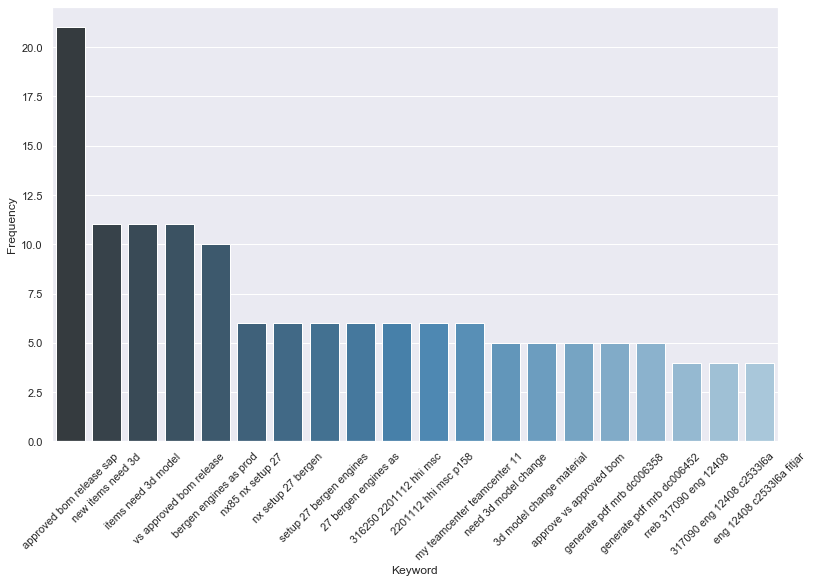

In [34]:
import pandas
fwords=["please",'to',"hi","hello","on"]
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(4,4),  
            max_features=2000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    words_freq=[i for i in words_freq if i not in fwords ]
    return words_freq[:n]


# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)
#top_df.to_csv(file_prefix + '_top_words.csv')

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
#g.figure.savefig(file_prefix + "_keyword.png", bbox_inches = "tight")

In [35]:
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory
0,2142,ERClassification quality improvement,Hi find attach one example possible cleanups n...,1 Teamcenter,(7) Classification,Active,Moved DATA Streaming,7 Classification
1,2182,ERSTEP Type Dataset,Hi Is possible add new dataset type list Teamc...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service
2,2229,ERBOM REPORT ISSUES,Hi Omar I discuss Vinay Below fix issue In Str...,1 Teamcenter,(14) Configuration Changes,Active,No Resolution,14 Configuration Changes
3,2497,ERVS Vekt fra TC til SAP,Hi Find attach list wheigths How automate uplo...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service
4,2508,ERVS Vekt fra TC til SAP,Data Stream,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service
...,...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error approval Please check complete What reas...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service
2894,1334,DC0202059 error,One similar error Please check complete,1 Teamcenter,(1) TC services,Resolved,1,1 TC service
2895,1344,Type error save BOM tc,When save BOM TC I get message Does something ...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service
2896,1346,URGENT CAD file standard part,Can please create CAD part follow part C111101...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df_sample['Title'])
X_train_counts.shape

(2898, 3068)

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2898, 3068)

# Categorization

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [39]:
#Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['Title'],df['Category'],test_size=0.3)

In [40]:
df['Category'].unique()

array(['1 Teamcenter', '3 T4S', '2 NX', '5 Data Corrections',
       '10 User Errros'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder
le_Category = LabelEncoder()
#le_SubCategory = LabelEncoder()
df['Category_encoded'] = le_Category.fit_transform(df.Category)
df
#df['SubCategory_encoded'] = le_SubCategory.fit_transform(df.SubCategory)

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory,Category_encoded
0,2142,ERClassification quality improvement,Hi find attach one example possible cleanups n...,1 Teamcenter,(7) Classification,Active,Moved DATA Streaming,7 Classification,0
1,2182,ERSTEP Type Dataset,Hi Is possible add new dataset type list Teamc...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,0
2,2229,ERBOM REPORT ISSUES,Hi Omar I discuss Vinay Below fix issue In Str...,1 Teamcenter,(14) Configuration Changes,Active,No Resolution,14 Configuration Changes,0
3,2497,ERVS Vekt fra TC til SAP,Hi Find attach list wheigths How automate uplo...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,0
4,2508,ERVS Vekt fra TC til SAP,Data Stream,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,0
...,...,...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error approval Please check complete What reas...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,0
2894,1334,DC0202059 error,One similar error Please check complete,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,0
2895,1344,Type error save BOM tc,When save BOM TC I get message Does something ...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,0
2896,1346,URGENT CAD file standard part,Can please create CAD part follow part C111101...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,0


In [42]:
from sklearn.preprocessing import OneHotEncoder
Category_ohe = OneHotEncoder()
#SubCategory_ohe = OneHotEncoder()
Train_Y = Category_ohe.fit_transform(df.Category_encoded.values.reshape(-1,1)).toarray()
#Test_Y = Category_ohe.fit_transform(df.Category_encoded.values.reshape(-1,1)).toarray()
#Y = Category_ohe.fit_transform(df.Category_encoded.values.reshape(-1,1)).toarray()

#Xm = SubCategory_ohe.fit_transform(df.SubCategory_encoded.values.reshape(-1,1)).toarray()

In [43]:
dfOneHot = pd.DataFrame(Train_Y, columns = ["Category_"+str(int(i)) for i in range(Train_Y.shape[1])])
df15 = pd.concat([df, dfOneHot], axis=1)
#dfOneHot = pd.DataFrame(Xm, columns = ["SubCategory"+str(int(i)) for i in range(X.shape[1])])
#df = pd.concat([df, dfOneHot], axis=1)
df15

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory,Category_encoded,Category_0,Category_1,Category_2,Category_3,Category_4
0,2142,ERClassification quality improvement,Hi find attach one example possible cleanups n...,1 Teamcenter,(7) Classification,Active,Moved DATA Streaming,7 Classification,0,1.0,0.0,0.0,0.0,0.0
1,2182,ERSTEP Type Dataset,Hi Is possible add new dataset type list Teamc...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,0,1.0,0.0,0.0,0.0,0.0
2,2229,ERBOM REPORT ISSUES,Hi Omar I discuss Vinay Below fix issue In Str...,1 Teamcenter,(14) Configuration Changes,Active,No Resolution,14 Configuration Changes,0,1.0,0.0,0.0,0.0,0.0
3,2497,ERVS Vekt fra TC til SAP,Hi Find attach list wheigths How automate uplo...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,0,1.0,0.0,0.0,0.0,0.0
4,2508,ERVS Vekt fra TC til SAP,Data Stream,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error approval Please check complete What reas...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,0,1.0,0.0,0.0,0.0,0.0
2894,1334,DC0202059 error,One similar error Please check complete,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,0,1.0,0.0,0.0,0.0,0.0
2895,1344,Type error save BOM tc,When save BOM TC I get message Does something ...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,0,1.0,0.0,0.0,0.0,0.0
2896,1346,URGENT CAD file standard part,Can please create CAD part follow part C111101...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,0,1.0,0.0,0.0,0.0,0.0


In [44]:
df

,IssueID,Title,Description,Category,Sub-Category,IssueStatus,Resolution,SubCategory,Category_encoded
0,2142,ERClassification quality improvement,Hi find attach one example possible cleanups n...,1 Teamcenter,(7) Classification,Active,Moved DATA Streaming,7 Classification,0
1,2182,ERSTEP Type Dataset,Hi Is possible add new dataset type list Teamc...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,0
2,2229,ERBOM REPORT ISSUES,Hi Omar I discuss Vinay Below fix issue In Str...,1 Teamcenter,(14) Configuration Changes,Active,No Resolution,14 Configuration Changes,0
3,2497,ERVS Vekt fra TC til SAP,Hi Find attach list wheigths How automate uplo...,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,0
4,2508,ERVS Vekt fra TC til SAP,Data Stream,1 Teamcenter,(1) TC services,Active,No Resolution,1 TC service,0
...,...,...,...,...,...,...,...,...,...
2893,1326,DC0201996 error,Error approval Please check complete What reas...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,0
2894,1334,DC0202059 error,One similar error Please check complete,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,0
2895,1344,Type error save BOM tc,When save BOM TC I get message Does something ...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,0
2896,1346,URGENT CAD file standard part,Can please create CAD part follow part C111101...,1 Teamcenter,(1) TC services,Resolved,1,1 TC service,0


In [76]:
df15["IssueStatus"].unique()

array(['Active', 'Closed', 'Resolved'], dtype=object)

In [46]:
from sklearn.preprocessing import LabelBinarizer
Y12 = LabelBinarizer()
Train_Y = Y12.fit_transform(df.Category.values)
#Test_Y = Y12.fit_transform()
Train_Y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [89]:
len(list(Train_Y))

2898

In [63]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,Y,test_size=0.3)

In [61]:
X=df15[["Category_0","Category_1","Category_2","Category_3","Category_4"]]
Y=df15["Category_encoded"]

In [74]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  100.0


In [70]:
Y.unique()

array([0, 3, 2, 4, 1])

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['Title'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)



In [93]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
#term_vectors.todense()
#[0, 1, 1, 1]
# [0, 1, 0, 2]
tfidf.fit(df["Title"])
tf_idf_matrix = tfidf.transform(Train_X)

ValueError: could not convert string to float: 'ERClassification quality improvement'

In [50]:
X=df["Category"]


In [52]:
enc = OneHotEncoder(handle_unknown = 'ignore')
Train_Y = enc.fit_transform(df.Category_encoded.values.reshape(-1,1)).toarray()

In [53]:
enc.fit(Train_Y)

OneHotEncoder(handle_unknown='ignore')

In [66]:
Train_Y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [54]:
enc.transform(Train_Y).toarray()

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [55]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [57]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [50]:
# The classification SVC model
model = svm.SVC(kernel="linear")
clf = model.fit( Train_X,Train_Y.ravel())


ValueError: could not convert string to float: 'Renaming'

In [ ]:
fig, ax = plt.subplots()
# title for the plots
title = ("Decision surface of linear SVC")
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("{}".format(feature_names[0]))
ax.set_xlabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [140]:
C=Train_X_Tfidf.toarray()

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [146]:
tfidf = TfidfVectorizer()

response = tfidf.fit_transform(Train_X)
feature_names = tfidf.get_feature_names()
for col in response.nonzero()[1]:
    print (feature_names[col], ' - ', response[0, col])

urgent  -  0.43428640450348943
tc  -  0.3411482312313571
list  -  0.5674733700932332
part  -  0.3839804513071399
vs  -  0.4749170353231622
class  -  0.0
classifcation  -  0.0
ms5  -  0.0
still  -  0.0
ps3  -  0.0
available  -  0.0
teamcenter  -  0.0
modify  -  0.0
texts  -  0.0
ar  -  0.0
bulkheads  -  0.0
show  -  0.0
jt  -  0.0
why  -  0.0
report  -  0.0
bom  -  0.0
make  -  0.0
able  -  0.0
not  -  0.0
re  -  0.0
cxss  -  0.0
bc  -  0.0
meld  -  0.0
grønn  -  0.0
wrong  -  0.0
pcs  -  0.0
set  -  0.0
state  -  0.0
item  -  0.0
changing  -  0.0
dc0204190  -  0.0
bvag2  -  0.0
listcommissioning  -  0.0
spare  -  0.0
d1111446309  -  0.0
part  -  0.3839804513071399
igjen  -  0.0
utfordringer  -  0.0
dc0200720  -  0.0
ecn  -  0.0
center  -  0.0
team  -  0.0
access  -  0.0
error  -  0.0
tc  -  0.3411482312313571
baustein  -  0.0
release  -  0.0
namesize  -  0.0
removechange  -  0.0
d1111711847  -  0.0
note  -  0.0
information  -  0.0
change  -  0.0
item  -  0.0
sap  -  0.0
slu  -  0.0
b36

In [162]:
res=[]
for col in response.nonzero()[1]:
    res.append(response[1,col])

In [166]:
res=res[:2028]
len(Train_Y)

2028

In [101]:
def compute(documents):
    import math
    N=len(documents)
    idfDict=dict.fromkeys(documents[0].keys(),0)
    for doc in documents:
        for word,val in documents.items():
            if val>0:
                idfDict[word]+=1
    for word,val in idfDict.items():
        idfDict[word]=math.log(N/float(val))
    return idfDict

In [111]:
for i in k:
    compute(k)

AttributeError: 'list' object has no attribute 'keys'

In [112]:
k=[]
for i in df["Title"]:
    k.append(i)

In [115]:
from pyspark.mllib.feature import HashingTF, IDF

# Load documents (one per line).
#documents = sc.textFile("data/mllib/kmeans_data.txt").map(lambda line: line.split(" "))

hashingTF = HashingTF()
tf = hashingTF.transform(df["Title"])

# While applying HashingTF only needs a single pass to the data, applying IDF needs two passes:
# First to compute the IDF vector and second to scale the term frequencies by IDF.


In [123]:
tf.cache()
idf = IDF().fit(tf)
#tfidf = idf.transform(tf)

AttributeError: 'SparseVector' object has no attribute 'cache'

In [120]:
from pyspark.ml.linalg import DenseVector, SparseVector, Vector, Vectors, VectorUDT 
from pyspark.sql.functions import udf


In [125]:
tf.unpersist()

AttributeError: 'SparseVector' object has no attribute 'unpersist'